In [20]:
import numpy as np
import theano
import theano.tensor as T
rng = np.random

N = 400
feats = 784

D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

# declare Theano vars
x = T.dmatrix("X")
y = T.vector("y")

# initialize weight vector and bias
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")

print("Initial Model:")
print("b: {}\nw: {}".format(b.get_value(), w.get_value()))

p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))
preds = p_1 > 0.5
xent = -y * T.log(p_1) - (1-y) * T.log(1 - p_1)
cost = xent.mean() + 0.01 * (w ** 2).sum()

gw, gb = T.grad(cost, [w, b])

train = theano.function(
            inputs=[x,y],
            outputs=[preds, xent],
            updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=preds)

# train
E = []
for i in range(training_steps):
    pred, err = train(D[0], D[1])
    E.append(err.mean())

print("Final model:")
print(w.get_value())
print(b.get_value())
print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

Initial Model:
b: 0.0
w: [ -7.04695036e-01   1.22814668e+00  -2.24834290e+00   5.13258537e-01
   4.52476135e-01  -1.60937197e+00  -1.11151618e-01   9.62646086e-01
  -7.60728994e-01  -1.93959753e+00  -1.50624222e+00  -9.20212326e-01
  -1.56219598e+00   6.95631933e-01   1.19439733e+00  -2.00829746e-01
   6.46113935e-01  -2.80852793e-01   2.61177880e-01   3.90712207e-01
  -8.61592756e-01  -8.97588929e-01   8.52299439e-01   2.19750182e+00
   9.02115950e-01  -2.10133327e+00  -8.31621821e-01  -1.59019190e+00
   8.63517557e-01   1.08517206e+00   9.66504648e-02   6.21853851e-01
   9.91121538e-01   2.36295214e-01  -7.50063883e-01  -3.27377575e-01
  -1.21205285e+00   2.33951628e-01  -1.85089923e+00   8.58601827e-01
   3.92261767e-01  -5.97131739e-01  -3.52767772e-02   4.59884780e-01
  -6.40144085e-01  -1.24986402e+00  -3.71751741e-01  -1.09978903e+00
   1.18784802e+00  -1.03629260e+00  -4.10403130e-01  -9.02821236e-01
  -4.39327241e-01   9.63070144e-02  -1.24767925e+00  -3.85975751e-01
   2.9229

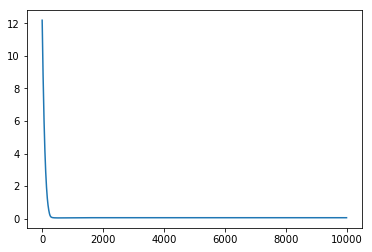

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E)

In [30]:
# declare Theano vars
x = T.dmatrix("X")
y = T.vector("y")

# initialize weight vector and bias
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")

p_2 = 1 / (1 + T.exp(-T.dot(x, w) - b))
preds2 = p_2 > 0.5
mse = 0.5*T.sqr(y - p_2)
cost2 = mse.mean() + 0.01 * (w ** 2).sum()

gw, gb = T.grad(cost2, [w, b])

train = theano.function(
            inputs=[x,y],
            outputs=[preds2, mse],
            updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=preds2)
predict_proba = theano.function(inputs=[x], outputs=p_2)

# train
E = []
for i in range(training_steps):
    pred, err = train(D[0], D[1])
    E.append(err.mean())

print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

target values for D:
[0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0]
prediction on D:
[0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0


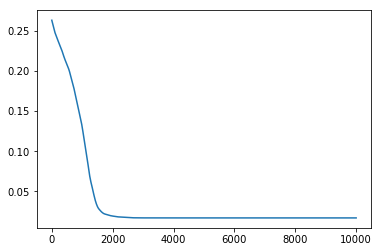

In [31]:
plt.plot(E)